## Workshop 4

## Kevin Joan Delgado Pérez A01706328

## 23/08/2022

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Calculate cc returns of both stocks and drop NA values

In [ ]:
precios = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
precios = precios['Adj Close']

In [ ]:
rprec = np.log(precios) - np.log(precios.shift(1))
rprec=rprec.dropna()
rprec.columns=['ALFAA','MXX']

Do a scatter plot including the regression line and interpret the plot

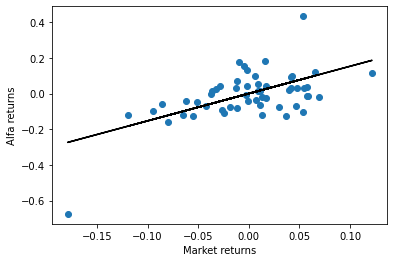

In [ ]:
x = rprec['MXX']
y = rprec['ALFAA']

plt.scatter(x, y)
v1,v0 = np.polyfit(x,y,1)
yline = (v0+v1)*x
plt.plot(x, yline, c = "black")

plt.xlabel("Market returns")
plt.ylabel("Alfa returns")
plt.show()

Interpretation:

EN LA GRÁFICA SE OBSERVA LA POSIBILIDAD DE QUE, EL VALOR DE LOS RETORNOS DE ALFA TIENEN EL MISMO COMPORTAMIENTO QUE LOS RETORNOS DE MARKET CUANDO AUMENTAN, POR LO QUE LA LINEA DE REGRESIÓN TIENDE A SER POSITIVA.

In [ ]:
import statsmodels.api as stats

In [ ]:
X = stats.add_constant(x)
mkmodel = stats.OLS(y,X).fit()
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.36e-06
Time:                        04:01:34   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Write down the regression equation

Respuesta.

LA ECUACIÓN ES: -0.007785460330175878 + 1.5394835507302118*MXX

Interpret the beta coefficients and their corresponding t and p values, and their 95% confidence intervals

Respuesta.

TENIENDO EN CUENTA QUE EL COEFICIENTE DE B1 ES EN BUENA PARTE MUCHO MAYOR A 0 Y EL P-VALUE ES MAYOR A 0.005, EXISTE UNA BUENA RELACION (POSITIVA) ENTRE AMBAS VARIABLES EN UN 95% DE LAS VECES. DADO QUE T VALUE DE B1 ES MUCHO MAYOR A 2, SE ESTIMA EN UN NIVEL DE CONFIANZA DEL 95% QUE LA HIPOTESIS NULA DEL COEFICIENTE PUEDE SER RECHAZADA.

TENIENDO EN CUENTA QUE B1 ES 1.53, QUIERE DECIR QUE SI LOS RETORNOS EN EL MERCADO DISMINUYEN EN UN 100%, LOS RETORNOS DE EN ESTE CASO ALFA, TAMBIÉN DISMINUIRÁN EN UN 153% Y, TAMBIÉN VICEVERSA, LO CUAL GENERA UN GRAN RIESGO EN EL MERCADO.
 